# Reports data EDA

### About the data

The dataset contains sales-related information for a range of **football socks** (from the adidas brand), differentiated by **product color and size**, covering multiple years.

Each row represents a unique combination of product **color** (identified by index), **size**, and **year**, along with a set of sales and inventory metrics. The dataset is synthetic but structured to resemble realistic retail data. It was generated for the purpose of **exploratory data analysis (EDA)** and building **predictive machine learning models** (e.g., forecasting future sales or demand).

The dataset spans **12 product colors** and **8 sizes** (from KXXL to XS) for the years **2022 to 2025**, enabling time-based trend analysis and modeling.

### Columns:
* **`INDEX`** – Unique identifier of the product (varies by color)  
* **`BRAND`** – Product brand (fixed: adidas)  
* **`CATEGORY LVL1`** – Product category (fixed: TEKSTYLIA)  
* **`SIZE`** – Sock size (e.g., KXXL, XS, M, etc.)  
* **`Sales Net PLN`** – Net revenue from sales (in PLN)  
* **`Sales in COGS PLN`** – Cost of goods sold (in PLN)  
* **`Sales Margin PLN`** – Gross profit: Sales Net minus COGS  
* **`Sales Margin %`** – Gross margin expressed as a percentage  
* **`WOH 4W`** – Weeks of stock on hand (last 4 weeks)  
* **`WOH 13W`** – Weeks of stock on hand (last 13 weeks)  
* **`Stock Value PLN`** – Value of inventory (in PLN)  
* **`Stock Quantity`** – Number of items currently in stock  
* **`Units Sold`** – Number of units sold in the given year  
* **`Return Ratio`** – Ratio of returned products to units sold (percentage)  
* **`Year of Sales`** – Year the sale occurred  


In [17]:
import pandas as pd
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


dfs = pd.read_excel('synth_sales_milanosocks_2022-2025.xlsx', sheet_name=None)

df = pd.concat(dfs.values(), ignore_index=True)
df.head(10)


,INDEX,BRAND,CATEGORY LVL1,SIZE,Sales Net PLN,Sales in COGS PLN,Sales Margin PLN,Sales Margin %,WOH 4W,WOH 13W,Stock Value PLN,Stock Quantity,Units Sold,Return Ratio,Year of Sales
0,HT6538,adidas,TEKSTYLIA,KXXL,14867.180000,9484.09,5383.090000,36.2%,30.1,27.5,9442.8833,382.0,169,1.0%,2022
1,HT6538,adidas,TEKSTYLIA,KXL,4428.670049,4825.83,-397.159951,-9.0%,35.5,35.9,5730.1802,207.0,202,1.1%,2022
2,HT6538,adidas,TEKSTYLIA,XS,13109.410000,9538.67,3570.740000,27.2%,33.6,31.6,9559.8777,591.0,418,1.8%,2022
3,HT6538,adidas,TEKSTYLIA,S,11153.100000,7021.49,4131.610000,37.0%,1.1,0.9,8414.7167,41.0,297,4.6%,2022
4,HT6538,adidas,TEKSTYLIA,M,9958.950000,7658.82,2300.130000,23.1%,20.3,22.3,3619.5960,340.0,1776,1.6%,2022
5,HT6538,adidas,TEKSTYLIA,L,11248.650000,6339.25,4909.400000,43.6%,35.7,50.3,4053.1632,730.0,306,2.0%,2022
6,HT6538,adidas,TEKSTYLIA,XL,8422.360000,6147.31,2275.050000,27.0%,19.4,27.9,9679.2302,694.0,309,3.7%,2022
7,HT6538,adidas,TEKSTYLIA,XXL,14894.200000,10945.91,3948.290000,26.5%,30.8,41.5,12600.8008,28.0,283,1.6%,2022
8,IB7813,adidas,TEKSTYLIA,KXXL,11454.930000,7472.56,3982.370000,34.8%,20.8,30.3,12217.5999,430.0,276,4.1%,2022
9,IB7813,adidas,TEKSTYLIA,KXL,5380.330000,4291.42,1088.910000,20.2%,35.7,51.7,3504.8670,619.0,328,1.1%,2022


## Eksploratory data analysis:
#### 1. Data overview
##### Random records


In [5]:
df.sample(15, random_state=42) 

,INDEX,BRAND,CATEGORY LVL1,SIZE,Sales Net PLN,Sales in COGS PLN,Sales Margin PLN,Sales Margin %,WOH 4W,WOH 13W,Stock Value PLN,Stock Quantity,Units Sold,Return Ratio,Year of Sales
268,IB7820,adidas,TEKSTYLIA,M,3311.63,1851.94,1459.69,44.1%,13.9,16.2,12343.7516,638.0,129,1.6%,2024
250,IB7815,adidas,TEKSTYLIA,XS,13294.78,7829.51,5465.27,41.1%,47.8,65.2,1448.9844,795.0,257,NaN,2024
355,IB7822,adidas,TEKSTYLIA,S,6011.46,3313.37,2698.09,44.9%,19.7,26.8,4814.0834,667.0,262,0.8%,2025
332,IB7817,adidas,TEKSTYLIA,M,6260.75,3584.41,2676.34,42.7%,45.1,35.5,4880.7363,326.0,28,3.3%,2025
56,IB7815,adidas,TEKSTYLIA,KXXL,1650.24,1255.25,394.99,23.9%,35.5,35.6,8216.2037,494.0,1776,4.4%,2022
372,IB7816,adidas,TEKSTYLIA,M,13523.92,8906.79,4617.13,34.1%,9.7,7.3,656.2387,704.0,275,3.3%,2025
33,IB7818,adidas,TEKSTYLIA,KXL,12708.97,9142.67,3566.30,28.1%,26.1,33.5,1542.7332,138.0,468,3.2%,2022
114,IB7814,adidas,TEKSTYLIA,XS,9796.09,6372.55,3423.54,34.9%,13.1,18.3,8837.2231,199.0,479,3.1%,2023
375,IB7816,adidas,TEKSTYLIA,XXL,14098.11,10347.40,3750.71,26.6%,14.2,12.8,3499.9424,711.0,203,3.7%,2025
238,IB7817,adidas,TEKSTYLIA,XL,13144.08,7516.73,5627.35,42.8%,2.7,3.6,7070.0899,231.0,542,0.7%,2024


* For most products sales margin is positive but the first thing I see in the first overview is the negative margin in the second row. It's unusual so I have to check whether it's true or maybe some kind of failure or outlayer. 
* Sales net varies depending on the size and the color (different index means different color). I will check which colors are being sold more often and why. 
* Return ratio is higher for some products. The reason may lie in poor quality or inaccurate description, so it's worth considering as well. 
* The data seems to not have any empty fields but it doesn't mean that they are not present. I will check it in the next steps of EDA.

##### Unique values

In [6]:
df.nunique()

INDEX                 12
BRAND                  1
CATEGORY LVL1          1
SIZE                   8
Sales Net PLN        383
Sales in COGS PLN    384
Sales Margin PLN     384
Sales Margin %       197
WOH 4W               265
WOH 13W              279
Stock Value PLN      384
Stock Quantity       303
Units Sold           272
Return Ratio          46
Year of Sales          4
dtype: int64

* 12 INDEX - True, because we have 12 colors where each of them has it's own index,
* 1 BRAND - Adidas,
* 1 CATEGORY LVL1 - Yes, all of them are football socks,
* 8 SIZES - Correct - from KXXL to XXL,
* 4 Year of Sales - Yes, from 2022 to 2025.
* The rest of the data is not unique which is correct too.

#### 2. Missing values analysis

In [8]:
df.isnull().sum()

INDEX                 0
BRAND                 0
CATEGORY LVL1         0
SIZE                  0
Sales Net PLN         0
Sales in COGS PLN     0
Sales Margin PLN      0
Sales Margin %        0
WOH 4W                0
WOH 13W              22
Stock Value PLN       0
Stock Quantity       17
Units Sold            0
Return Ratio         41
Year of Sales         0
dtype: int64

There are 41 missing values in Return Ratio column, 22 in WOH12W and 7 in Stock Quantity. I have decided to fill them with group median for starters. Then I want to evaluate whether model improves with implementing different measurements.

#### 3. Individual variables analysis
* histograms


array([[<Axes: title={'center': 'Sales Net PLN'}>,
        <Axes: title={'center': 'Sales in COGS PLN'}>,
        <Axes: title={'center': 'Sales Margin PLN'}>],
       [<Axes: title={'center': 'WOH 4W'}>,
        <Axes: title={'center': 'WOH 13W'}>,
        <Axes: title={'center': 'Stock Value PLN'}>],
       [<Axes: title={'center': 'Stock Quantity'}>,
        <Axes: title={'center': 'Units Sold'}>,
        <Axes: title={'center': 'Year of Sales'}>]], dtype=object)

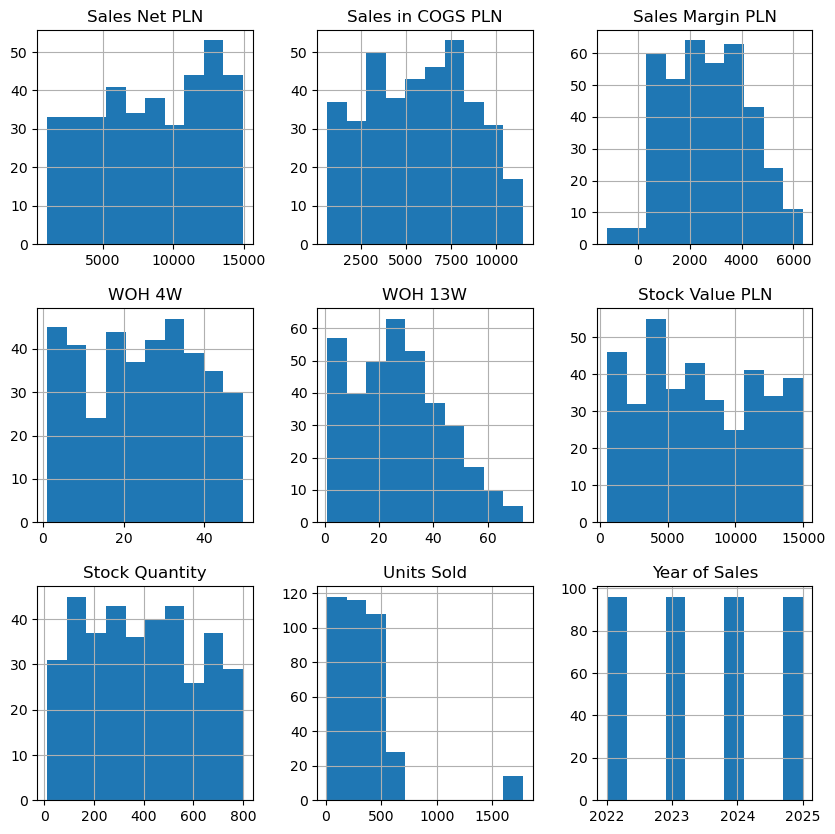

In [9]:
df.hist(figsize = (10, 10))

<Axes: >

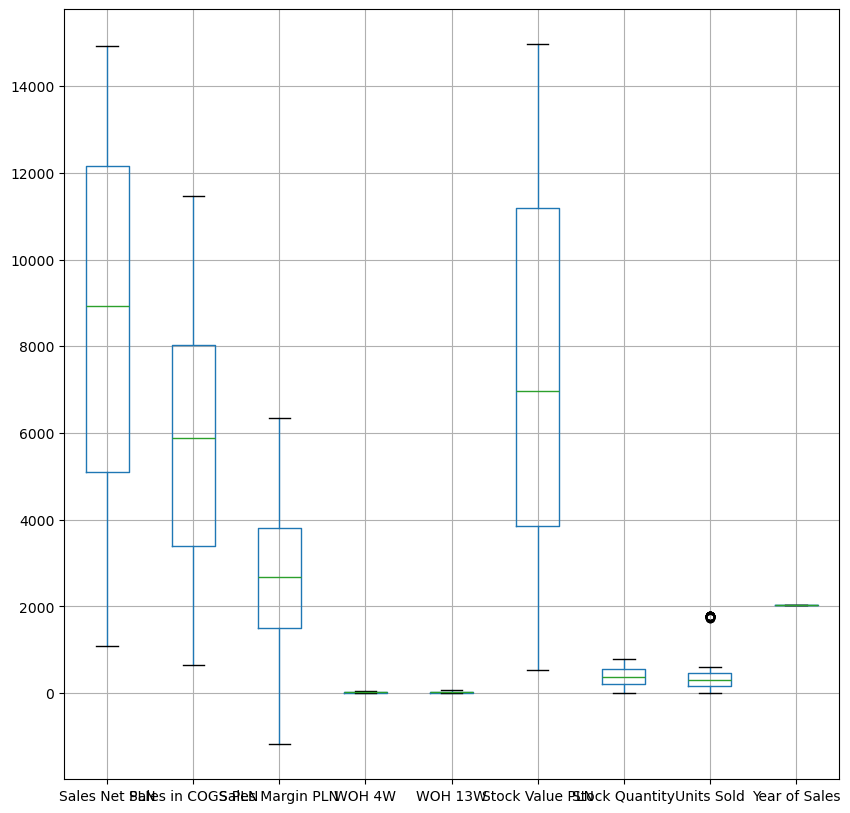

In [ ]:
df.boxplot(figsize = (10, 10), column=['Sales Net PLN'])
#Change figsize or part the plot because it is too crowded

Conclusions...
* 

#### 4. Data transformations
##### Data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX              384 non-null    object 
 1   BRAND              384 non-null    object 
 2   CATEGORY LVL1      384 non-null    object 
 3   SIZE               384 non-null    object 
 4   Sales Net PLN      384 non-null    float64
 5   Sales in COGS PLN  384 non-null    float64
 6   Sales Margin PLN   384 non-null    float64
 7   Sales Margin %     384 non-null    object 
 8   WOH 4W             384 non-null    float64
 9   WOH 13W            362 non-null    float64
 10  Stock Value PLN    384 non-null    float64
 11  Stock Quantity     367 non-null    float64
 12  Units Sold         384 non-null    int64  
 13  Return Ratio       343 non-null    object 
 14  Year of Sales      384 non-null    int64  
dtypes: float64(7), int64(2), object(6)
memory usage: 45.1+ KB


* INDEX - it's necessery to use one hot encoding for ML model,


* outlayers?
* missing values (ratio)
* units
* data types

* titles 
* scatter plot
* sizes x sales

#### 5. Features correlation analysis
* ...

<Axes: >

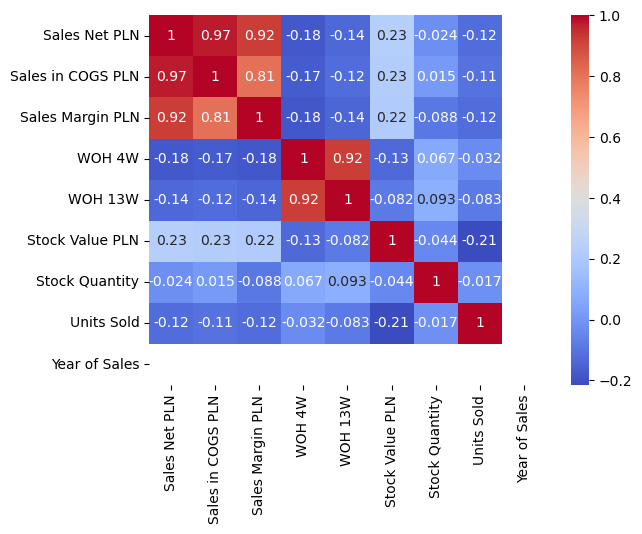

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

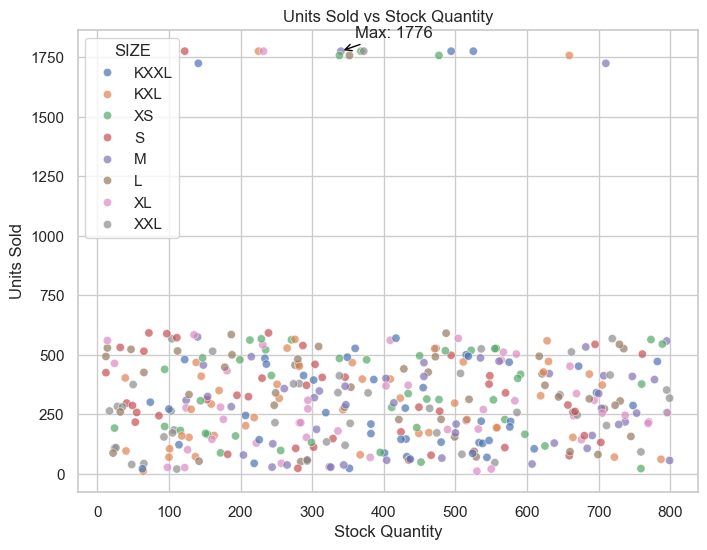

In [19]:
# Settings
sns.set_theme(style="whitegrid", palette="deep")

# 1. Scatter: Units Sold vs Stock Quantity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Stock Quantity", y="Units Sold", hue="SIZE", alpha=0.7)
plt.title("Units Sold vs Stock Quantity")
plt.xlabel("Stock Quantity")
plt.ylabel("Units Sold")
max_point = df.loc[df["Units Sold"].idxmax()]
plt.annotate(f"Max: {max_point['Units Sold']}", 
             (max_point["Stock Quantity"], max_point["Units Sold"]),
             xytext=(10,10), textcoords="offset points", 
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()



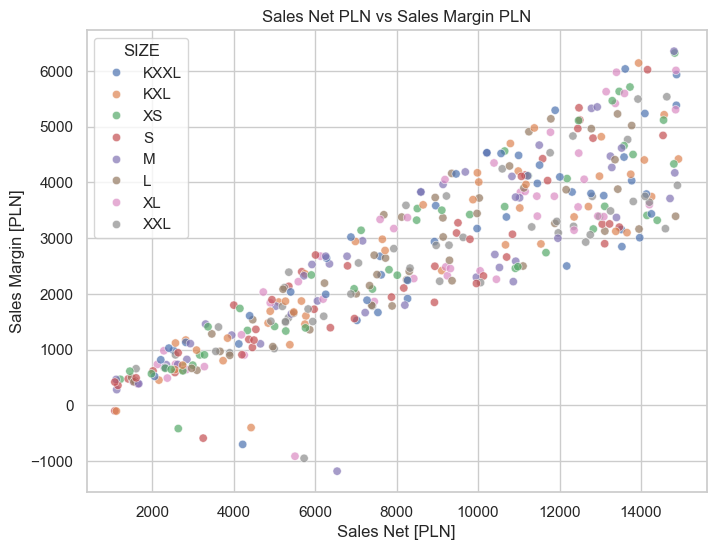

In [20]:
# 2. Scatter: Sales Net PLN vs Sales Margin PLN
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales Net PLN", y="Sales Margin PLN", hue="SIZE", alpha=0.7)
plt.title("Sales Net PLN vs Sales Margin PLN")
plt.xlabel("Sales Net [PLN]")
plt.ylabel("Sales Margin [PLN]")
plt.show()

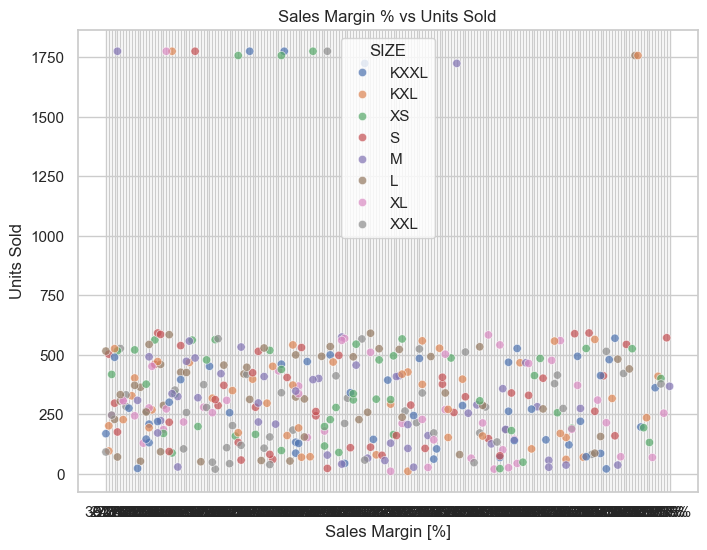

In [21]:
# 3. Scatter: Sales Margin % vs Units Sold
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Sales Margin %", y="Units Sold", hue="SIZE", alpha=0.7)
plt.title("Sales Margin % vs Units Sold")
plt.xlabel("Sales Margin [%]")
plt.ylabel("Units Sold")
plt.show()

C:\Users\Aleksandra\AppData\Local\Temp\ipykernel_21444\602744449.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="SIZE", y="Units Sold", estimator=sum, ci=None)


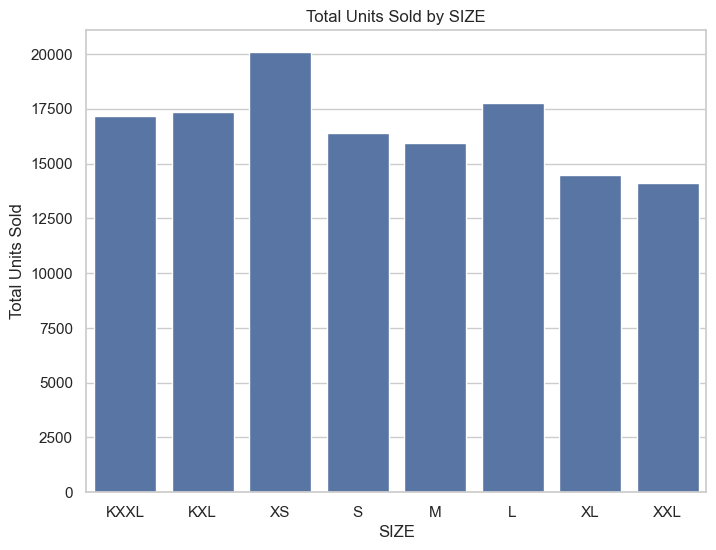

In [22]:
# 4. Bar: Total Units Sold by SIZE
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="SIZE", y="Units Sold", estimator=sum, ci=None)
plt.title("Total Units Sold by SIZE")
plt.xlabel("SIZE")
plt.ylabel("Total Units Sold")
plt.show()

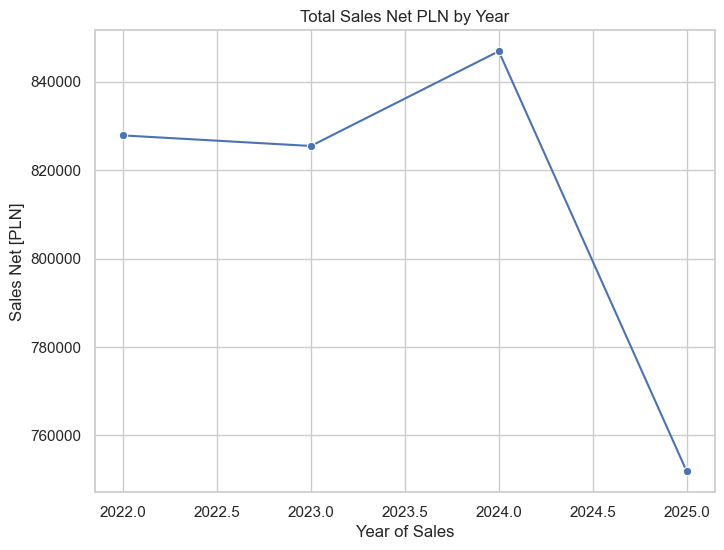

In [23]:
# 5. Line: Total Sales Net PLN by Year of Sales
plt.figure(figsize=(8,6))
sns.lineplot(data=df.groupby("Year of Sales", as_index=False).agg({"Sales Net PLN": "sum"}), 
             x="Year of Sales", y="Sales Net PLN", marker="o")
plt.title("Total Sales Net PLN by Year")
plt.xlabel("Year of Sales")
plt.ylabel("Sales Net [PLN]")
plt.show()

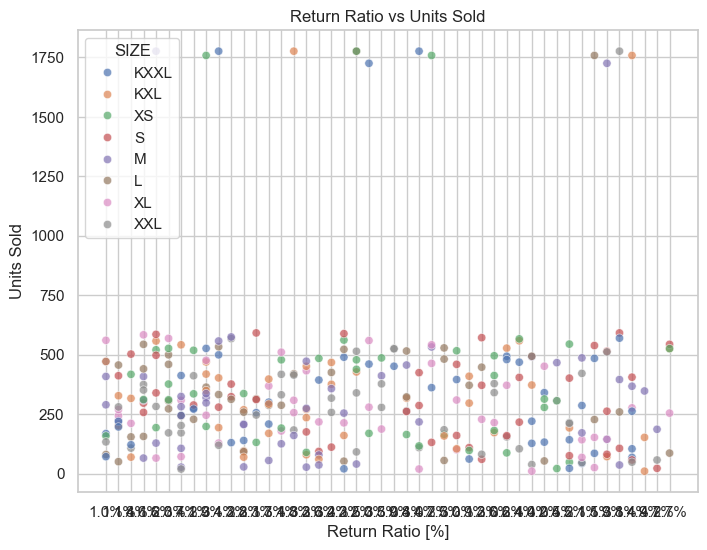

In [24]:
# 6. Scatter: Return Ratio vs Units Sold
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Return Ratio", y="Units Sold", hue="SIZE", alpha=0.7)
plt.title("Return Ratio vs Units Sold")
plt.xlabel("Return Ratio [%]")
plt.ylabel("Units Sold")
plt.show()

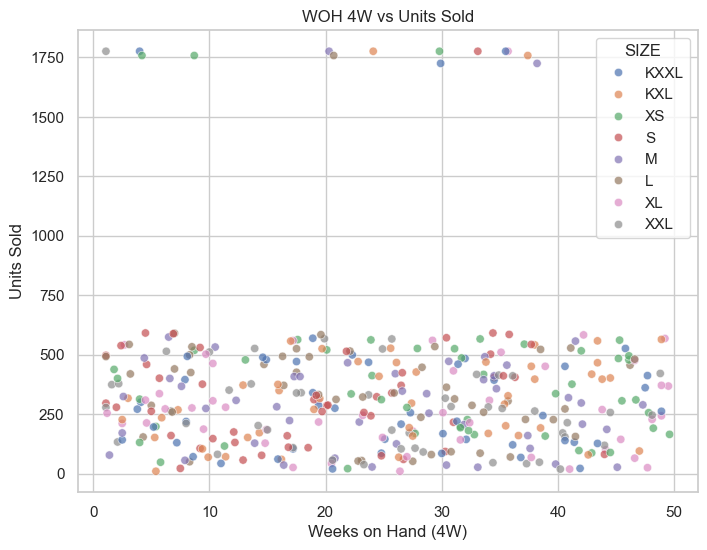

In [25]:
# 7. Scatter: WOH 4W vs Units Sold
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="WOH 4W", y="Units Sold", hue="SIZE", alpha=0.7)
plt.title("WOH 4W vs Units Sold")
plt.xlabel("Weeks on Hand (4W)")
plt.ylabel("Units Sold")
plt.show()

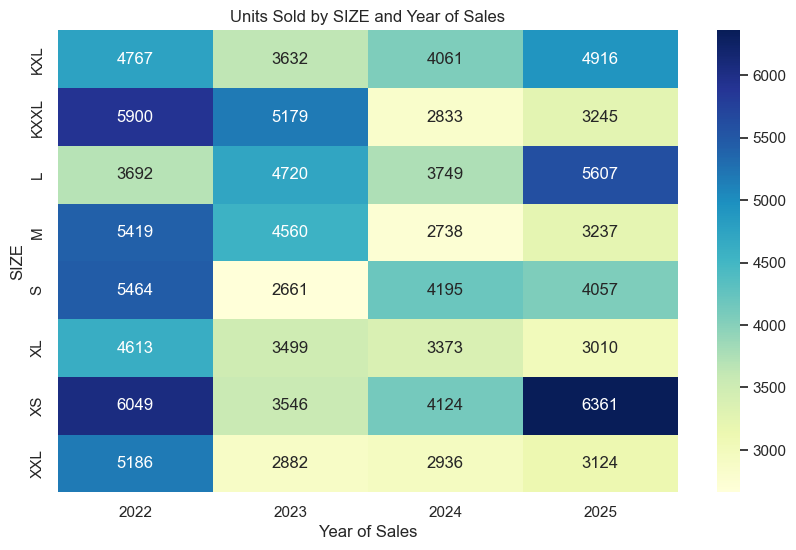

In [26]:
# 8. Heatmap: SIZE + Year of Sales vs Units Sold
heatmap_data = df.pivot_table(index="SIZE", columns="Year of Sales", values="Units Sold", aggfunc="sum")
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Units Sold by SIZE and Year of Sales")
plt.xlabel("Year of Sales")
plt.ylabel("SIZE")
plt.show()